In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2  # Thư viện OpenCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


image_path="/content/drive/MyDrive/data/train/"

#doc anh vs nhan

images=[]
labels=[]
cls_paths=os.listdir(image_path)

for p in cls_paths:
    cls_img_path=os.path.join(image_path,p)
    label=p[-1]
    for i in os.listdir(cls_img_path):
        img=cv2.imread(os.path.join(cls_img_path,i))
        img=cv2.resize(img,(32,32))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = img / 255.0
        images.append(img)
        labels.append(label)


dodai=len(images)
images=np.array(images)
images=images.reshape(-1, 32, 32, 1)
labels=np.array(labels)
print(images)
print(labels)
print(f"So luong anh : {dodai}")
print(images.dtype)
print(images.shape)



[[[[0.        ]
   [0.00392157]
   [0.        ]
   ...
   [0.00392157]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.00392157]
   [0.00392157]
   [0.        ]]

  [[0.        ]
   [0.00392157]
   [0.        ]
   ...
   [0.        ]
   [0.00392157]
   [0.00392157]]

  ...

  [[0.        ]
   [0.34117647]
   [0.5372549 ]
   ...
   [0.34509804]
   [0.00392157]
   [0.01176471]]

  [[0.        ]
   [0.00392157]
   [0.00392157]
   ...
   [0.00784314]
   [0.00784314]
   [0.        ]]

  [[0.        ]
   [0.01176471]
   [0.00392157]
   ...
   [0.00784314]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.00392157]]

  [[0.00784314]
   [0.        ]
   [0.00392157]
   ...
   [0.        ]
   [0.00392157]
   [0.        ]]

  [[0.00392157]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.00392157]
   [0.        ]]

  ...

  [[0.69019608]
   [0.68627451]
   [0.6

In [ ]:
# chuyển đổi nhãn từ số thành chữ do đầu vào của mô hình
def string_to_int(a):
    str_int={"A":10,"B":11,"C":12,"D":13,"E":"14","F":15,"G":16,"H":17,
             "I":18,"J":19,"K":20,"L":21,"M":22, "N":23,"O":24,"P":25,"Q":26,"R":27, "S":28,
             "T":29,"U":30,"V":31,"W":32,"X":33,"Y":34,"Z":35}
    return str_int[a]

def chuyendoi(listds):
    list_dacd=[]
    for i in listds:
        if i.isalpha():
            list_dacd.append(string_to_int(i))
        else:
            list_dacd.append(int(i))
    return list_dacd


labels_new=chuyendoi(labels)
labels_new=np.array(labels_new, dtype=int)

print(labels_new)

[35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35
 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33
 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26

In [ ]:
# chuyen doi so sang ki tu
def int_to_string(a):
    ints_string={10:"A", 11:"B", 12:"C", 13:"D", 14:"E", 15:"F", 16:"G", 17:"H",
                 18:"I", 19:"J", 20:"K", 21:"L", 22:"M", 23:"N",
                 24:"O", 25:"P", 26:"Q", 27:"R", 28:"S",
                 29:"T", 30:"U", 31:"V", 32:"W", 33:"X", 34:"Y", 35:"Z"}
    return ints_string[a]
print(int_to_string(19))

J


In [ ]:
# for filename in os.listdir(img_path):
#     if filename.endswith('.jpg'):
#         file_path=os.path.join(img_path, filename)

#         #doc aanh va chuyển sang xám chuẩn hoá kích thươc 28x28
#         img=cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
#         img=cv2.resize(img,(32,32))
#         img = img / 255.0

#         nhan=os.path.splitext(filename)[0]
#         images.append(img)
#         labels.append(int(nhan[-1]))

# np_images=np.array(images)
# np_labels=np.array(labels)


# print(len(categories))
# np_images = np_images.reshape(-1, 32, 32, 1)
# print(f"So anh : {len(np_images)}")
# print(np_images)
# print(np_labels)


In [ ]:

# Chia du lieu thanh tap huan luyen va kiem tra

image_train, image_test, label_train, label_test = train_test_split(images, labels_new, test_size=0.2, random_state=42)

train_labels = set(label_train)
test_labels = set(label_test)
missing_labels = test_labels - train_labels
print("Labels in test set but not in training set:", missing_labels)



Labels in test set but not in training set: set()


In [ ]:


# Tao mo hinh
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(dodai, activation='softmax'))



In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(image_train, label_train, epochs=40, batch_size=42, validation_data=(image_test, label_test))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.0314 - loss: 6.2158 - val_accuracy: 0.0649 - val_loss: 3.6822
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1131 - loss: 3.7211 - val_accuracy: 0.3784 - val_loss: 2.5362
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2698 - loss: 2.6107 - val_accuracy: 0.6811 - val_loss: 1.4712
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4276 - loss: 1.8655 - val_accuracy: 0.7892 - val_loss: 0.7804
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6296 - loss: 1.1275 - val_accuracy: 0.8757 - val_loss: 0.4722
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7379 - loss: 0.8423 - val_accuracy: 0.9459 - val_loss: 0.2833
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8136 - loss: 0.5779 - val_accuracy: 0.9622 - val_loss: 0.2111
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8783 - loss: 0.4220 - val_accuracy: 0.9622 - val_loss

In [ ]:
loss, accuracy = model.evaluate(image_test, label_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.1085 
Test Accuracy: 0.97


In [ ]:
# Thử dự đoán luôn trên mô hình nơron
def predict_image(img):
    img = cv2.resize(img, (32, 32))
    img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # img = img.astype(np.float32)
    img = img / 255.0
    img_array = np.expand_dims(img, axis=0)  # Thêm chiều batch
    img_array = np.expand_dims(img_array, axis=-1)
    # print(img.dtype)
    # print(img_array.shape)
    prediction = model.predict(img_array)
    # print(prediction)
    predicted_class = cls_paths[np.argmax(prediction)]  # Lấy nhãn dự đoán
    return predicted_class

anhmoi=cv2.imread("/content/drive/MyDrive/data/char_12.jpg")
print(predict_image(anhmoi))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
class_5


In [ ]:
# Lấy đặc trưng
features=[]
for img in images:
    img = cv2.resize(img, (32, 32))
    img = img.astype(np.float32)
    img = img / 255.0
    img_array = np.expand_dims(img, axis=0)  # Thêm chiều batch để có chiều hợp lí để đưa vào mô hình nơron tìm đặc trưng.
    img_array = np.expand_dims(img_array, axis=-1)
    features.append(model.predict(img_array))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [ ]:
print(features)

features=np.array(features)
print(features.dtype)
print(features.shape)

In [ ]:
# dặt lại số chiều của đặc trưng de phu hop vs mo hinh knn(2 chieu)
features=features.reshape(-1, len(features))
print(features.shape)
print(features)

# np.save('features.npy', features)
# import pickle
# with open('features.pkl', 'wb') as f:
#     pickle.dump(features, f)

(924, 924)
[[0.00369099 0.00764798 0.00386845 ... 0.00072296 0.00075972 0.00091078]
 [0.00368864 0.00761803 0.00385099 ... 0.0007237  0.00075904 0.00090917]
 [0.00367747 0.00757653 0.00386175 ... 0.00072437 0.00075849 0.00090836]
 ...
 [0.00362767 0.00748043 0.00376807 ... 0.00072657 0.00076609 0.00090736]
 [0.00368286 0.00754519 0.00381783 ... 0.00072375 0.00076495 0.00090633]
 [0.00366178 0.00749963 0.00379121 ... 0.00072492 0.0007669  0.00090575]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features_train, features_test, lb_knn_train, lb_knn_test = train_test_split(features, labels_new, test_size=0.2, random_state=42)
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(features,labels_new)

y_pred = knn_model.predict(features_test)

accuracy = accuracy_score(lb_knn_test,y_pred)
print(f"Độ chính xác của mô hình KNN: {accuracy * 100:.2f}%")



Độ chính xác của mô hình KNN: 97.30%


In [ ]:
def xulyanh(img):
    img = img / 255.
    img=np.array(img)
    img_array = np.expand_dims(img, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    feature=model.predict(img_array)
    feature=np.array(feature)
    feature=feature.reshape(1,-1)
    predic=knn_model.predict(feature)
    return predic[0]
# print(xulyanh("char_27.jpg"))


In [ ]:
def tesst(path):
    img=cv2.imread(path)
    img=cv2.resize(img,(32,32))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img = img / 255.
    img=np.array(img)
    img_array = np.expand_dims(img, axis=0)  # Thêm chiều batch
    img_array = np.expand_dims(img_array, axis=-1)
    feature=model.predict(img_array)
    feature=np.array(feature)
    feature=feature.reshape(1,-1)
    predic=knn_model.predict(feature)
    return predic[0]
# print(tesst("/content/drive/MyDrive/TTNTNHOM7/data/train/class_0/class_0_11.jpg"))

Góc nghiêng : 8.999992370605469


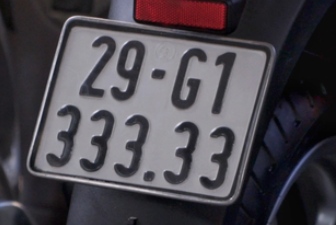

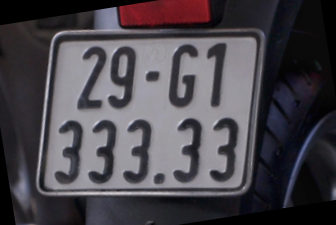

In [ ]:
# Xử lý ảnh nghiêng
from google.colab.patches import cv2_imshow
def xulynghieng(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,gray=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    # Áp dụng Gaussian Blur để giảm nhiễu
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Phát hiện biên bằng Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Phát hiện các đường thẳng bằng Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Tính toán góc nghiêng của ảnh từ các đường thẳng phát hiện được
    angle = 0
    if lines is not None:
        for rho, theta in lines[:, 0]:
            # Tính toán góc của đường thẳng
            angle = np.degrees(theta) - 90  # Điều chỉnh góc sao cho phù hợp
            break  # Chỉ cần một đường thẳng để tính góc
    print("Góc nghiêng : "+str(angle))

    # Xoay ảnh để đưa về góc thẳng
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated
nghieng=cv2.imread("/content/drive/MyDrive/data/anhnghiengmoi.jpg")

rotated=xulynghieng(nghieng)
cv2_imshow( nghieng)
cv2_imshow( rotated)

cv2.waitKey(0)
cv2.destroyAllWindows()

Saving cat.jpg to cat.jpg
Ảnh đã tải lên: /content/drive/MyDrive/TTNTNHOM7/data/train/
Góc nghiêng : 0


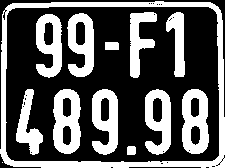

toa do 36 14 26 64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
toa do 67 13 27 64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
toa do 130 12 27 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
toa do 166 12 19 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
toa do 16 89 27 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
toa do 53 89 28 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
toa do 92 89 26 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
toa do 145 89 26 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
toa do 182 89 27 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Giá trị nhận được về biển số xe là : 
[9, 9, 'F', 1, 4, 'B', 9, 9, 'B']


In [ ]:
from google.colab import files
from IPython.display import display
string_kitu=[]
def tachkituandxuly(path):
    image = cv2.imread(path)
    image=xulynghieng(image)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blurred=cv2.GaussianBlur(gray,(5,5),0)
    edges = cv2.Canny(blurred, 50, 150)
    # Tìm đường viền của biển số
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        # điều kiện để xét là có 4 điểm theo hàm tìm đa giác approxPoluPD
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = w / float(h)
            # Đặt điều kiện để có thể tìm thấy biển số
            if 1 < aspect_ratio < 2 and w > 200 and h > 20:
                plate_image = image[y:y+h, x:x+w]
                plate_gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
                # chuyển thành ảnh nhị phân đen trắng cho dễ phân biệt chữ
                _, plate_thresh = cv2.threshold(plate_gray, 127, 255, cv2.THRESH_BINARY_INV)
                cv2_imshow(plate_thresh)

                # tìm ra các đường viền ở đây sử dụng RETR_LIST or RETR_TREE thay vì RETR_EXTERNAL vì RETR_EXTERNAL sẽ không thể tìm thấy được các kí tự.
                contours, _ = cv2.findContours(plate_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
                # sắp xếp theo chiều x và y để đọc đúng thứ tự
                contours = sapxep(contours)

                for i, char_contour in enumerate(contours):
                    x, y, w, h = cv2.boundingRect(char_contour)
                    # print(y)
                    aspect_char=h/float(w)
                    # đặt điều kiện chiều cao, rộng, tỉ lệ chiều cao vs rộng để tìm thấy kí tự chính xác trong các coutours
                    if 2 < aspect_char < 5 and w>5 and h>30:
                        char_image = plate_image[y:y+h, x:x+w]
                        char_image=cv2.resize(char_image,(32,32))

                        char_image=cv2.cvtColor(char_image,cv2.COLOR_BGR2GRAY)
                        _, char_image = cv2.threshold(char_image, 127, 255, cv2.THRESH_BINARY_INV)
                        print("toa do",x,y,w,h)
                        # cv2.imshow("anh ki tu",char_image)
                        # cv2.waitKey(0)
                        # cv2.imwrite(f"char_{i}.jpg", char_image)  # Lưu ảnh từng ký tự
                        # print(xulyanh(char_image))
                        string_kitu.append(xulyanh(char_image))
                break
cv2.destroyAllWindows()

def sapxep(list_ds):
    list_ds=sorted(list_ds,key=lambda coutour: cv2.boundingRect(coutour)[1])
    list_ds_use=[]
    curent_y=-1
    list_ds_curent=[]

    for coutour_ds in list_ds:
        x,y,w,h=cv2.boundingRect(coutour_ds)
        if abs(y - curent_y) > h:
            list_ds_curent=sorted(list_ds_curent, key=lambda coutour: cv2.boundingRect(coutour)[0])
            list_ds_use.extend(list_ds_curent)
            list_ds_curent=[]
            list_ds_curent.append(coutour_ds)
            curent_y=y

        else:
            list_ds_curent.append(coutour_ds)
            curent_y=y
    list_ds_curent=sorted(list_ds_curent,key=lambda coutour: cv2.boundingRect(coutour)[0])
    list_ds_use.extend(list_ds_curent)

    return list_ds_use

def upload_and_recognize_image():
        uploaded = files.upload()  # Tải lên ảnh từ máy tính
        if not uploaded:
            print("No file uploaded. Exiting.")

        image_pathsss = list(uploaded.keys())[0]  # Lấy tên file của ảnh vừa tải lên
        print(f"Ảnh đã tải lên: {image_path}")
        tachkituandxuly(image_pathsss)
        for i in range(len(string_kitu)):
          if string_kitu[i]>9:
            string_kitu[i]=int_to_string(string_kitu[i])
        print("Giá trị nhận được về biển số xe là : ")
        print(string_kitu)

# Bắt đầu nhận diện
upload_and_recognize_image()